<a href="https://colab.research.google.com/github/D-Mayerfeld/intro-numerical-methods/blob/master/15_LA_gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

Note:  This material largely follows the text "Numerical Linear Algebra" by Trefethen and Bau (SIAM, 1997) and is meant as a guide and supplement to the material presented there.

In [1]:
import numpy
import matplotlib.pyplot as plt

%matplotlib inline


# Gaussian Elimination

Gaussian elimination is the process where one transforms a matrix or linear system through a series of operations into one that is at the very least upper triangular (it is often also presented as including the operation that transforms $A$ completely to diagonal).  These series of operations can be written as a sequence of successive matrix-matrix multiplications by lower triangular matrices.  Letting these "elimination matrices" be $E_j$ and the resulting upper triangular matrix be $U$ we can write this as
$$
    \overbrace{E_{m-1} \cdots E_2 E_1}^{L^{-1}} A = U.
$$
Labeling the successive operations as $L^{-1}$ allows us to move $L$ to the other side of the equation and we see that in fact what we have done is computed another factorization of the matrix $A$ called the $LU$ factorization.

### Example

As an example of this process lets consider the matrix
$$
    A = \begin{bmatrix}
        2 & 1 & 1 & 0 \\
        4 & 3 & 3 & 1 \\
        8 & 7 & 9 & 5 \\
        6 & 7 & 9 & 8
    \end{bmatrix}
$$

The first step is to remove the values in the first column below the diagonal, to do this we can multiply by the matrix

$$
    E_1 = \begin{bmatrix}
         1 &   &   &  \\
        -2 & 1 &   &  \\
        -4 &   & 1 &  \\
        -3 &   &   & 1
    \end{bmatrix}\quad\text{so that}\quad E_1 A = E_1\begin{bmatrix}
        2 & 1 & 1 & 0 \\
        4 & 3 & 3 & 1 \\
        8 & 7 & 9 & 5 \\
        6 & 7 & 9 & 8
    \end{bmatrix} = \begin{bmatrix}
        2 & 1 & 1 & 0 \\
          & 1 & 1 & 1 \\
          & 3 & 5 & 5 \\
          & 4 & 6 & 8
    \end{bmatrix}.
$$

To construct $E_1$, we first define the element $a_{11} = 2$ as the "Pivot" and the $i,1$ component of $E_1$ as
the _negative_ of the "multiplier"
$$
    \ell_{i,1} = \frac{a_{i1}}{a_{11}}
$$
which is the number,  that, when multiplied by the pivot and _subtracted_ from the $a_{i1}$ element puts a zero in the $i,1$ position.  Put another way  each row of $E_1$ subtracts some multiple of the first row from each row (except the first which remains the same)  that put's a zero below the diagonal and changes all the other elements.

Once the first column is zero'd out below the diagonal,  we can repeat the process for the smaller $3\times3$ matrix starting at the  ${22}$ element
$$
E_1 A = \begin{bmatrix}
        2 & 1 & 1 & 0 \\
          & 1 & 1 & 1 \\
          & 3 & 5 & 5 \\
          & 4 & 6 & 8
    \end{bmatrix}
$$

The next step is to remove the values below the diagonal of the second column.  This can be done with
$$
    E_2 = \begin{bmatrix}
         1 &    &   &   \\
           &  1 &   &   \\
           & -3 & 1 &   \\
           & -4 &   & 1
    \end{bmatrix} \text{ so that } E_2 E_1 A = \begin{bmatrix}
        2 & 1 & 1 & 0 \\
          & 1 & 1 & 1 \\
          &   & 2 & 2 \\
          &   & 2 & 4
    \end{bmatrix}.
$$

Finally we multiply $A$ by $E_3$ defined as
$$
    E_3 = \begin{bmatrix}
         1 &   &    &   \\
           & 1 &    &   \\
           &   &  1 &   \\
           &   & -1 & 1
    \end{bmatrix} \text{ so that } E_3 E_2 E_1 A = \begin{bmatrix}
        2 & 1 & 1 & 0 \\
          & 1 & 1 & 1 \\
          &   & 2 & 2 \\
          &   &   & 2
    \end{bmatrix}
$$
completing the factorization with
$$
    L^{-1} = E_3 E_2 E_1 = \begin{bmatrix}
         1 &   &    &   \\
           & 1 &    &   \\
           &   &  1 &   \\
           &   & -1 & 1
    \end{bmatrix}
    \begin{bmatrix}
         1 &    &   &   \\
           &  1 &   &   \\
           & -3 & 1 &   \\
           & -4 &   & 1
    \end{bmatrix}
    \begin{bmatrix}
         1 &   &   &   \\
        -2 & 1 &   &   \\
        -4 &   & 1 &   \\
        -3 &   &   & 1
    \end{bmatrix}
$$
and
$$
    U = \begin{bmatrix}
        2 & 1 & 1 & 0 \\
          & 1 & 1 & 1 \\
          &   & 2 & 2 \\
          &   &   & 2
    \end{bmatrix}
$$

We can actually easily invert $L$ (but don't really need to as you will find that $L$ is just a lower triangular matrix with 1 on the diagonal and the lower triangular elements are just the multipliers in their respective positions i.e.

$$
L_{ij}= \ell_{ij}
$$

in the and finally can write $A$ as
$$
    A = LU =
    \begin{bmatrix}
         1 &   &   &   \\
         2 & 1 &   &   \\
         4 & 3 & 1 &   \\
         3 & 4 & 1 & 1
    \end{bmatrix}\begin{bmatrix}
        2 & 1 & 1 & 0 \\
          & 1 & 1 & 1 \\
          &   & 2 & 2 \\
          &   &   & 2
    \end{bmatrix}
$$

Put another way,  the matrix $L$ just shows how the rows of $A$ can be constructed from the rows of $U$

## Solving $A\mathbf{x} = \mathbf{b}$

Given our factorization $A=LU$ it is now straightforward to solve the linear system $A\mathbf{x} = \mathbf{b}$
in just a few steps


1. Substitute $A=LU$  in our original equation to get
$$
    LU\mathbf{x} = \mathbf{b}
$$

1. Define $\mathbf{c} = U\mathbf{x}$  and solve $L \mathbf{c} =  \mathbf{b}$ using forward substitution.

1. Solve  $U \mathbf{x} = \mathbf{c}$ using backward substitution.

Problem, even if A is well conditioned, L and U might not be, and if they are not this will introduce error.

### Forward Substitution

For forward substitution we proceed from the first row and progress downwards through the matrix.  We can then consider the general $i$th row with
$$
    L_{i,1} y_1 + L_{i,2} y_2 + \cdots + L_{i,i-1} y_{i-1} + y_i = b_i
$$
noting that we are using the fact that the matrix $L$ has 1 on its diagonal.  We can now solve for $y_i$ as
$$
    y_i = b_i - \left( L_{i,1} y_1 + L_{i,2} y_2 + \cdots + L_{i,i-1} y_{i-1} \right ).
$$

### Backward Substitution

Backwards substitution requires us to move from the last row of $U$ and move upwards.  We can consider again the general $i$th row with
$$
    U_{i,i} x_i + U_{i,i+1} x_{i+1} + \ldots + U_{i,m-1} x_{m-1} + U_{i,m} x_m = y_i.
$$
We can now solve for $x_i$ as
$$
    x_i = \frac{1}{U_{i,i}} \left( y_i - ( U_{i,i+1} x_{i+1} + \ldots + U_{i,m-1} x_{m-1} + U_{i,m} x_m) \right )
$$

Unfortunately,  in most cases this will actually be unstable and can fail on even well-conditioned matrices

## Pivoting

As you may recall from your linear algebra course pivoting of the rows and columns of $A$ is often an important addition to Gaussian elimination to ensure that we can in fact factorize the matrix.  As a simple example take the matrix
$$
    A = \begin{bmatrix} 0 & 1 \\ 1 & 1 \end{bmatrix}.
$$
Without switching  the rows,  Gaussian elimination would fail at the first step!

A more insidious example is given by  the matrix

$$
    A = \begin{bmatrix} \epsilon & 1 \\ 1 & 1 \end{bmatrix}.
$$

on a finite precision machine where $\epsilon < \epsilon_{mach}$.

Just consider the solution by Gaussian elimination of the two identical problems

$$
    \begin{bmatrix} \epsilon & 1 \\ 1 & 1 \end{bmatrix}\mathbf{x} = \begin{bmatrix}  1 \\ 2 \end{bmatrix}\quad\text{and}\quad \begin{bmatrix}1 & 1 \\ \epsilon & 1  \end{bmatrix}\mathbf{x} = \begin{bmatrix}  2 \\ 1 \end{bmatrix}
$$

on a finite precision machine where $\epsilon < \epsilon_{mach}$.

Same ans, but if do with LU get completely different answers (many errors on the first one) --> due to condition number of LU matrices

Whenever have small number in the pivot position, want to switch it.

 In principle any row and column can be **pivoted** so that at each step we have the maximum value being used (on the diagonal) to perform the operations that compose the matrices $E_j$.  In practice however we restrict ourselves to only pivoting rows of the matrix (called partial pivoting).

The basic algorithm just adds an extra step of finding the largest element in any column $k$ in rows $m\geq k$, and swapping row $m$ for row $k$.  Row swaps can also be accomplished by multiplying by a permutation matrix $P_k$ which just reorders the rows of the identity matrix

How to logically think of permutation matrices (not how to computer them)

Consider again the example from above and switch the 1st and 3rd rows using the criteria that we always want to use the largest value to do perform the reduction.  Defining the first permutation matrix as
$$
    P_1 = \begin{bmatrix}
          &   & 1 &   \\
          & 1 &   &   \\
        1 &   &   &   \\
          &   &   & 1
    \end{bmatrix} \quad \text{so that} \quad
    P_1 A = P_1\begin{bmatrix}
        2 & 1 & 1 & 0 \\
        4 & 3 & 3 & 1 \\
        8 & 7 & 9 & 5 \\
        6 & 7 & 9 & 8
    \end{bmatrix} = \begin{bmatrix}
        8 & 7 & 9 & 5 \\
        4 & 3 & 3 & 1 \\
        2 & 1 & 1 & 0 \\
        6 & 7 & 9 & 8
    \end{bmatrix}
$$

Now defining the first $E_1$ as
$$
    E_1 = \begin{bmatrix}
        1 &   &   &   \\
        -\frac{1}{2} & 1 &   &   \\
        -\frac{1}{4} &   & 1 &   \\
        -\frac{3}{4} &   &   & 1
    \end{bmatrix} \quad \text{so that} \quad
    E_1 P_1 A = \begin{bmatrix}
        8 & 7 & 9 & 5 \\
          & -\frac{1}{2} & -\frac{3}{2} & -\frac{3}{2} \\
          & -\frac{3}{4} & -\frac{5}{4} & -\frac{5}{4} \\
          & \frac{7}{4} & \frac{9}{4} & \frac{17}{4}
    \end{bmatrix}.
$$

Now all values in E are less than or equal to 1.

Again examining the remaining values in column 2 the maximum value lies in row 4 so we want to interchange this with the second row (note that we do not want to move the first row as that will bring non-zero values into the first column below the diagonal).
$$
    P_2 = \begin{bmatrix}
        1 &   &   &   \\
          &   &   & 1 \\
          &   & 1 &   \\
          & 1 &   &
    \end{bmatrix}  \quad \text{and} \quad
    E_2 = \begin{bmatrix}
        1 &   &   &   \\
          & 1 &   &   \\
          & \frac{3}{7} & 1 &   \\
          & \frac{2}{7}  &   & 1
    \end{bmatrix}  \quad  \text{so that}  \quad
    E_2 P_2 E_1 P_1 A = \begin{bmatrix}
        8 &            7 &            9 &             5 \\
          &  \frac{7}{4} &  \frac{9}{4} &  \frac{17}{4} \\
          &              & -\frac{2}{7} &   \frac{4}{7} \\
          &              & -\frac{6}{7} &  -\frac{2}{7}
    \end{bmatrix}.
$$

Finally
$$
    P_3 = \begin{bmatrix}
        1 &   &   &   \\
          & 1 &   &   \\
          &   &   & 1 \\
          &   & 1 &
    \end{bmatrix}  \quad \text{and} \quad
    E_3 = \begin{bmatrix}
        1 &   &   &   \\
          & 1 &   &   \\
          &   & 1 &   \\
          &   & -\frac{1}{3} & 1
    \end{bmatrix} \quad \text{so that} \quad
    E_3 P_3 E_2 P_2 E_1 P_1 A = \begin{bmatrix}
        8 &            7 &            9 &             5 \\
          &  \frac{7}{4} &  \frac{9}{4} &  \frac{17}{4} \\
          &              & -\frac{6}{7} &  -\frac{2}{7} \\
          &              &              &   \frac{2}{3} \\
    \end{bmatrix}.
$$

### LU Factorization with Partial Pivoting

Due to the nature of the pivot matrices we can disentangle them from the matrices $E_j$.  Right now we have
$$
    E_3 P_3 E_2 P_2 E_1 P_1 A = U
$$
where what we want is
$$
    (E'_3 E'_2 E'_1) P_3 P_2 P_1 A = U.
$$

It turns out we can easily do this by
$$
    E'_3 = E_3, \quad E'_2 = P_3 E_2 P_3^{-1}, \quad \text{and} \quad E'_1 = P_3 P_2 E_1 P_2^{-1} P_3^{-1}.
$$
(Moreover, because Permutation matrices are unitary matrices,  then $P_k^{-1}=P_k^T$ so no inverses need be computed)
These new matrices $E'_j$ can easily be computed and it turns out that the $E'_j$ matrices have the same structure with the rows permuted accordingly.

In general then the $LU$ factorization with partial pivoting of the above example can be written as
$$
    \underbrace{\begin{bmatrix}
          &   & 1 &   \\
          &   &   & 1 \\
          & 1 &   &   \\
        1 &   &   &
    \end{bmatrix}}_{P = P_3 P_2 P_1} \underbrace{\begin{bmatrix}
        2 & 1 & 1 & 0 \\
        4 & 3 & 3 & 1 \\
        8 & 7 & 9 & 5 \\
        6 & 7 & 9 & 8
    \end{bmatrix}}_{A} =
    \underbrace{\begin{bmatrix}
        1           &              &              &   \\
        \frac{3}{4} &            1 &              &   \\
        \frac{1}{2} & -\frac{2}{7} &            1 &   \\
        \frac{1}{4} & -\frac{3}{7} & \frac{1}{3}  & 1 \\
    \end{bmatrix}}_{L}
    \underbrace{\begin{bmatrix}
        8 &            7 &            9 &             5 \\
          &  \frac{7}{4} &  \frac{9}{4} &  \frac{17}{4} \\
          &              & -\frac{6}{7} &  -\frac{2}{7} \\
          &              &              &   \frac{2}{3} \\
    \end{bmatrix}}_{U}
$$

### Some code for the LU with partial pivoting (translated from the matlab, courtesy of Cleve Moler)

Here is an implementation of an "in-place" algorithm transforming a matrix in place from $A$ to a matrix $LU$ where the diagonal and upper elements are replaced with $U$ and the strictly lower diagonal part of A is replaced with the multipliers in $L$.  This routine also returns a permuted index vector $p$ such that $b[p]= P\mathbf{b}$

A little hand-drawn animation of this algorithm, may go a long way to understanding it.

In [2]:
def lutx(A):
    """LUTX Triangular factorization, textbook version

    translated to python from the original Matlab from Cleve Moler

    L,U,p = lutx(A) produces a unit lower triangular matrix L,
    an upper triangular matrix U, and a permutation vector p,
    so that L*U = A(p,:)

    Parameters:
    -----------
    A: ndarray
        square numpy array

    Returns:
    --------
    L: ndarray NxN
        Lower triangular matrix with 1's on the diagonal and multipliers in place
    U: ndarray NxN
        Upper triangular matrix with Pivots on the diagonal
    p: ndarray size(N)
        permutation array
    """

    n,m = A.shape
    assert( n == m)

    # make a deep copy of the original matrix into U
    U = A.copy()
    p = numpy.array(range(n))

    for k in range(n-1):
        # Find index of largest element below diagonal in k-th column
        m = numpy.argmax(numpy.abs(U[k:,k])) + k
        # Skip elimination if column is zero
        if U[m,k] != 0. :
            # Swap pivot row
            if m != k :
                U[[k, m],:] = U[[m, k],:]
                p[[k, m]] = p[[m, k]];
        # Compute multipliers in place
        U[k+1:n,k] /= U[k,k]
        #Update the remainder of the matrix
        U[k+1:n,k+1:n] -=  numpy.outer(U[k+1:n,k],U[k,k+1:n])

    # Separate result and return
    L = numpy.tril(U,-1) + numpy.eye(n)
    U = numpy.triu(U)
    return L, U, p

### Let's apply this to our example problem

In [3]:
A = numpy.array([[2., 1., 1., 0.],
                 [4., 3., 3., 1.],
                 [8., 7., 9., 5.],
                 [6., 7., 9., 8.]])

In [4]:
L, U, p = lutx(A)
print('L=\n{}'.format(L))
print('U=\n{}'.format(U))
print('p={}'.format(p))


L=
[[ 1.          0.          0.          0.        ]
 [ 0.75        1.          0.          0.        ]
 [ 0.5        -0.28571429  1.          0.        ]
 [ 0.25       -0.42857143  0.33333333  1.        ]]
U=
[[ 8.          7.          9.          5.        ]
 [ 0.          1.75        2.25        4.25      ]
 [ 0.          0.         -0.85714286 -0.28571429]
 [ 0.          0.          0.          0.66666667]]
p=[2 3 1 0]


In [5]:
import scipy.linalg as la
P, LL, UU = la.lu(A)
print('L=\n{}'.format(LL))
print('U=\n{}'.format(UU))
print('P={}'.format(P.T))

L=
[[ 1.          0.          0.          0.        ]
 [ 0.75        1.          0.          0.        ]
 [ 0.5        -0.28571429  1.          0.        ]
 [ 0.25       -0.42857143  0.33333333  1.        ]]
U=
[[ 8.          7.          9.          5.        ]
 [ 0.          1.75        2.25        4.25      ]
 [ 0.          0.         -0.85714286 -0.28571429]
 [ 0.          0.          0.          0.66666667]]
P=[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


In [6]:
print('A=\n{}\n'.format(A))
print('p = {}'.format(p))

A=
[[2. 1. 1. 0.]
 [4. 3. 3. 1.]
 [8. 7. 9. 5.]
 [6. 7. 9. 8.]]

p = [2 3 1 0]


In [7]:
print('PA=\n{}'.format(A[p,:]))

PA=
[[8. 7. 9. 5.]
 [6. 7. 9. 8.]
 [4. 3. 3. 1.]
 [2. 1. 1. 0.]]


In [8]:
print('LU=\n{}'.format(L.dot(U)))

LU=
[[8.00000000e+00 7.00000000e+00 9.00000000e+00 5.00000000e+00]
 [6.00000000e+00 7.00000000e+00 9.00000000e+00 8.00000000e+00]
 [4.00000000e+00 3.00000000e+00 3.00000000e+00 1.00000000e+00]
 [2.00000000e+00 1.00000000e+00 1.00000000e+00 1.11022302e-16]]


## And let's use this to solve  $A\mathbf{x} = \mathbf{b}$

Given our factorization $PA=LU$ it is now straightforward to solve the linear system $A\mathbf{x} = \mathbf{b}$
in just a few steps





1. Multiply both sides by $P$ to yield $PA\mathbf{x} = P\mathbf{b}$ and substitute $PA=LU$ to get

$$
    LU\mathbf{x} = P\mathbf{b}
$$

1. Define $\mathbf{c} = U\mathbf{x}$  and solve $L \mathbf{c} = P  \mathbf{b}$ using forward substitution.

1. Solve  $U \mathbf{x} = \mathbf{c}$ using backward substitution.

Here we'll just use `numpy.linalg.solve` to solve the individual triangular systems but we could use more efficient forward and backward substitution codes.  

In [9]:
x = numpy.random.rand(4)
b = A.dot(x)

L,U,p = lutx(A)

c = numpy.linalg.solve(L,b[p])
xp = numpy.linalg.solve(U,c)

print(x)
print(xp)

numpy.testing.assert_allclose(x,xp)
print('success')

[0.88032899 0.36234169 0.79785109 0.79999559]
[0.88032899 0.36234169 0.79785109 0.79999559]
success


In [10]:
x = numpy.linalg.solve(A,b)
print(x)

[0.88032899 0.36234169 0.79785109 0.79999559]


### computational Costs

Gaussian elimination with partial pivoting is an extremely robust algorithm even for ill-conditioned matrices, however it is not cheap.  With a little work, it is easy to show that for a dense $n\times n$ matrix,  the $LU$ decomposition takes $O(n^3/3)$ operations, while the two forward and back substitutions take in total $O(n^2)$ operations.

For the large (but sparse) matrices that often arise from numerical PDE's, there are a host of other iterative methods that, under certain circumstances can solve linear systems in many fewer flops.  But that is another story.

### LU vs the matrix inverse $A^{-1}$

Formally,  one can solve $A\mathbf{x}=\mathbf{b}$ using the $PA=LU$ or as

$$
    \mathbf{x} = A^{-1}\mathbf{b}
$$

which will formally have $O(N^3 + N^2)$ operations (which is about 3 times slower than the LU).  However, in general, one rarely needs to calculate $A^{-1}$ and for many matrices arising from 2-pt BVP's it is a particulary bad idea as even if $A$ is sparse (e.g. tridiagonal),  the inverse $A^{-1}$ can often be dense.  The LU decomposition however, will preserve the sparsity structure for banded matrices.



We will demonstrate this here using the simplest 2-pt boundary value problem (the 1-D Poisson problem)

$$
    u_{xx} = f(x)\quad u(0)=u(L)=0
$$

or in its discrete form

$$
    D\mathbf{u} = \mathbf{f}
$$

where $D$ is a tridiagonal finite difference matrix, $\mathbf{u}=u(\mathbf{x})$ is the discrete solution and $\mathbf{f} = f(\mathbf{x})$ is the discrete approximation to the RHS.  

Reusing our sparse matrix code from the ODE BVP notebook

In [12]:
%%writefile fdcoeffV.py

import numpy
from  scipy.special import factorial

def fdcoeffV(k,xbar,x):
    """
    fdcoeffV routine modified from Leveque (2007) matlab function

    Params:
    -------

    k: int
        order of derivative
    xbar: float
        point at which derivative is to be evaluated
    x: ndarray
        numpy array of coordinates to use in calculating the weights

    Returns:
    --------
    c: ndarray
        array of floats of coefficients.

    Compute coefficients for finite difference approximation for the
    derivative of order k at xbar based on grid values at points in x.

    WARNING: This approach is numerically unstable for large values of n since
    the Vandermonde matrix is poorly conditioned.  Use fdcoeffF.m instead,
    which is based on Fornberg's method.

     This function returns a row vector c of dimension 1 by n, where n=length(x),
     containing coefficients to approximate u^{(k)}(xbar),
     the k'th derivative of u evaluated at xbar,  based on n values
     of u at x(1), x(2), ... x(n).

     If U is an array containing u(x) at these n points, then
     c.dot(U) will give the approximation to u^{(k)}(xbar).

     Note for k=0 this can be used to evaluate the interpolating polynomial
     itself.

    Requires len(x) > k.
    Usually the elements x(i) are monotonically increasing
    and x(1) <= xbar <= x(n), but neither condition is required.
    The x values need not be equally spaced but must be distinct.

    Modified rom  http://www.amath.washington.edu/~rjl/fdmbook/  (2007)
    """


    n = x.shape[0]
    assert  k < n, " The order of the derivative must be less than the stencil width"

    # Generate the Vandermonde matrix from the Taylor series
    A = numpy.ones((n,n))
    xrow = (x - xbar)  # displacements x-xbar
    for i in range(1,n):
        A[i,:] = (xrow**(i))/factorial(i);

    b = numpy.zeros(n)    # b is right hand side,
    b[k] = 1              # so k'th derivative term remains

    c = numpy.linalg.solve(A,b)          # solve n by n system for coefficients

    return c

Writing fdcoeffV.py


In [13]:
from fdcoeffV import fdcoeffV
from scipy.sparse import lil_matrix, identity, spdiags
from scipy.sparse.linalg import spsolve, splu, inv

def D2(x,bcs=['dirichlet', 'dirichlet']):
    """
        Assemble a general sparse second-order finite-difference approximation to d/dx^2 on a possibly irregular mesh
        First and last rows are set by string bcs

        parameters:
        -----------
        x: numpy.array
            mesh coordinates
        bcs: list of strings for boundary conditions e.g [left_string, right_string] where
            the strings can be either 'dirichlet' or 'neumann'
    """
    N = len(x)
    A = lil_matrix((N,N))
    if bcs[0] == 'dirichlet':
        A[0,0] = 1.
    elif bcs[0] == 'neumann':
        A[0,0:3] = fdcoeffV(1,x[0],x[:3])
    else:
        raise ValueError('no known BC type for left boundary {}'.format(bcs[0]))

    if bcs[1] == 'dirichlet':
        A[-1,-1] = 1.
    elif bcs[1] == 'neumann':
        A[-1,-3:] = fdcoeffV(1,x[-1],x[-3:])
    else:
        raise ValueError('no known BC type for right boundary {}'.format(bcs[1]))

    for i in range(1,N-1):
        A[i, i-1:i+2] = fdcoeffV(2, x[i], x[i-1:i+2] )
    return A.tocsc()

def RHS(x, f, bvalues):
    """ Set the rhs vector

        parameters
        ----------
        x: numpy.array
            mesh coordinates
        f: callable
            rhs function for interior points called on f(x[1:-2])
        bvalues:  numpy.array (len 2)
            values for boundary conditions (either dirichlet or neumann)
    """

    N = len(x)
    rhs = numpy.empty(N)
    rhs[[0, N-1]] = bvalues
    rhs[1:-1] = f(x[1:-1])

    return rhs

We'll set up a small $N$-point Finite Difference problem

In [14]:
N=101
x = numpy.linspace(0,1.,N)
A = D2(x)
func = lambda x: x
f = RHS(x,func,[0.,0.])

u = spsolve(A,f)

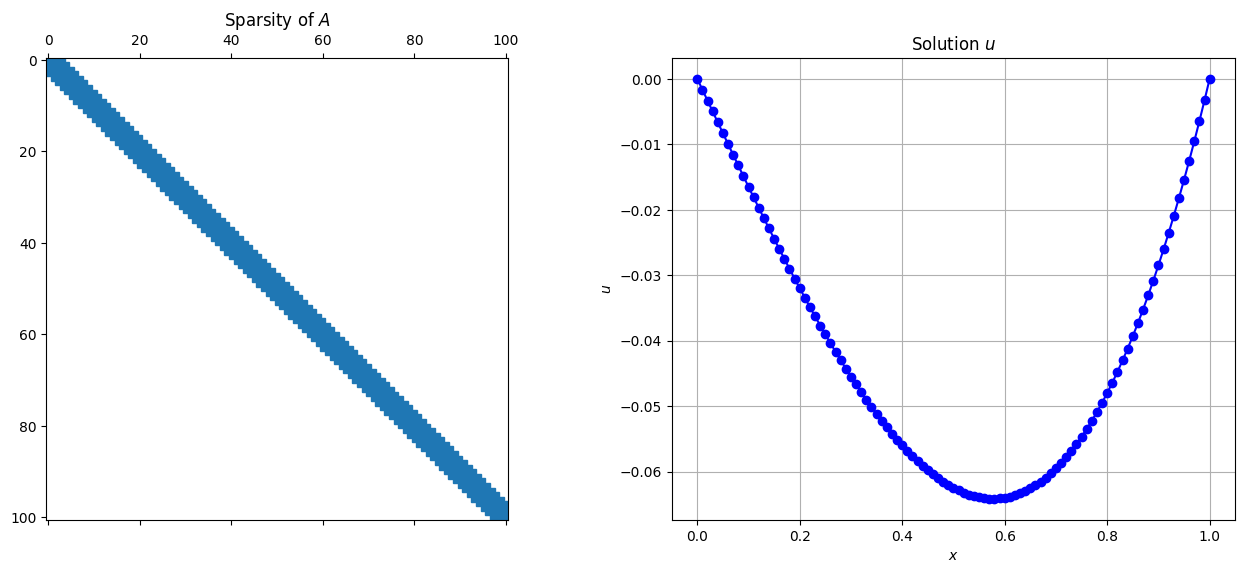

In [15]:
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1,2,1)
axes.spy(A)
axes.set_title('Sparsity of $A$')

axes = fig.add_subplot(1,2,2)
axes.plot(x,u,'bo-')
axes.grid()
axes.set_xlabel('$x$')
axes.set_ylabel('$u$')
axes.set_title('Solution $u$')
plt.show()

#### Visualizing $L,U$ and $A^{-1}$

scipy.sparse  also includes routines for calculating the inverse and permuted $L,U$ decompositions of sparse matrices $A$ using the parallel sparse package ``SuperLU``



In [16]:
B = splu(A, permc_spec='NATURAL')
Ainv = inv(A)

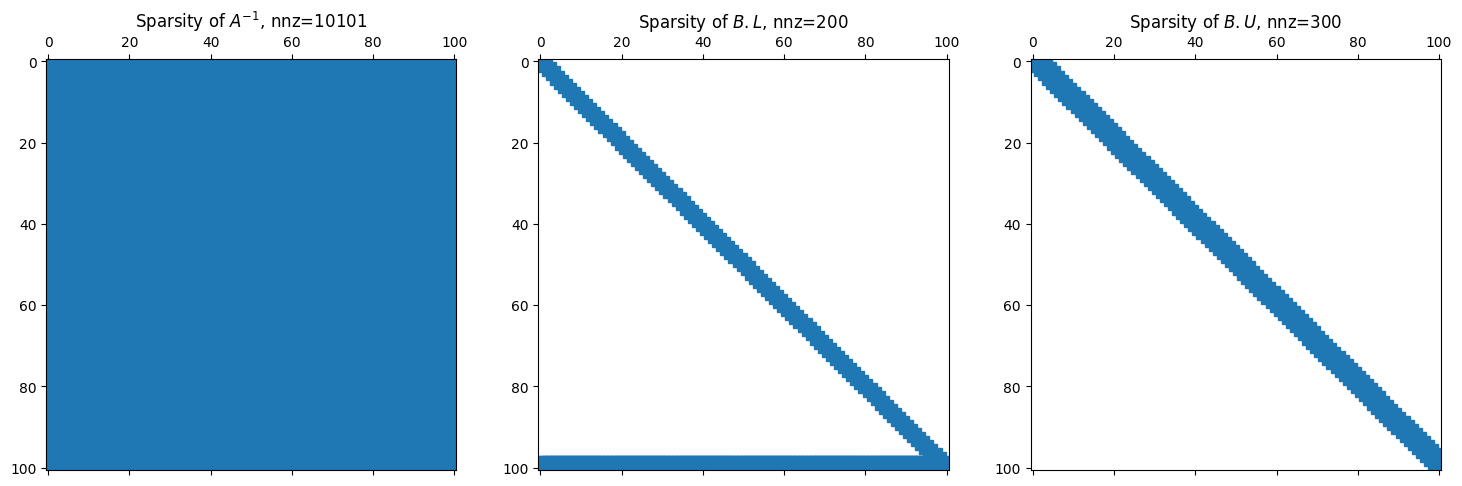

In [17]:
fig = plt.figure(figsize=(18,6))
axes = fig.add_subplot(1,3,1)
axes.spy(Ainv)
axes.set_title('Sparsity of $A^{{-1}}$, nnz={}'.format(Ainv.nnz))

axes = fig.add_subplot(1,3,2)
axes.spy(B.L)
axes.set_title('Sparsity of $B.L$, nnz={}'.format(B.L.nnz))

axes = fig.add_subplot(1,3,3)
axes.spy(B.U)
axes.set_title('Sparsity of $B.U$, nnz={}'.format(B.U.nnz))
plt.show()

### Check

And don't forget to check that we get the same answer...

In [18]:
err = (Ainv.dot(f) - B.solve(f))/numpy.finfo('float').eps
#print(err)

<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-3309099027.py:6: SyntaxWarning: invalid escape sequence '\e'
  axes.set_ylabel('err$/\epsilon_{mach}$')


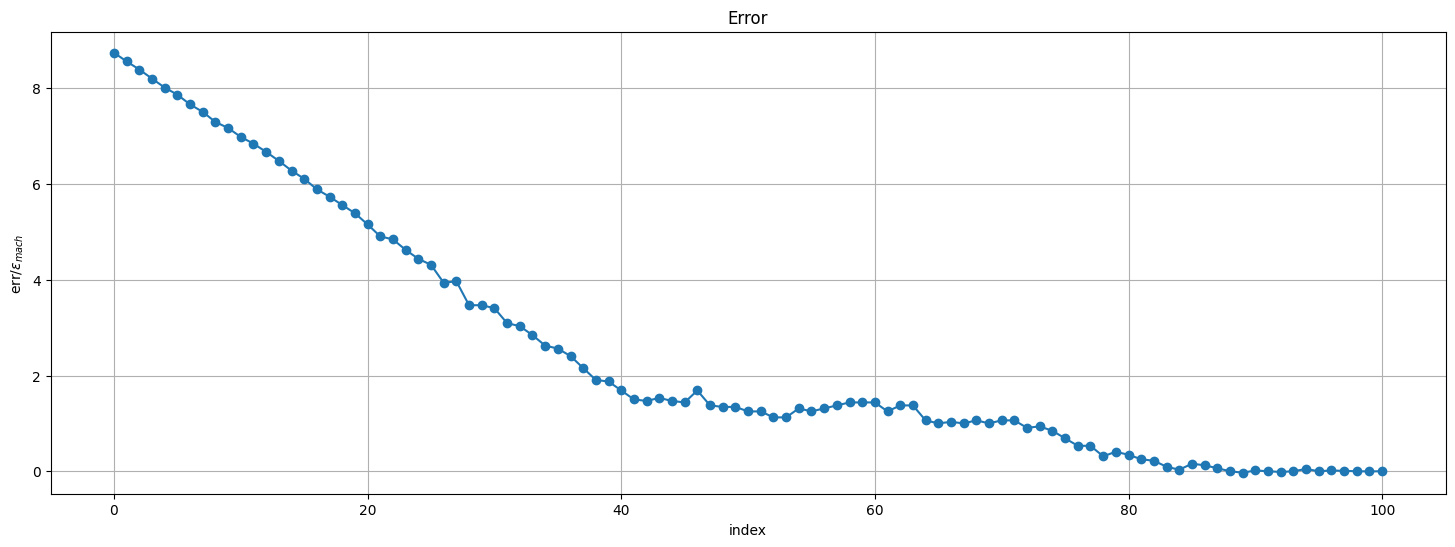

In [19]:
fig = plt.figure(figsize=(18,6))
axes = fig.add_subplot(1,1,1)
axes.plot(range(len(err)),err,'o-')
axes.grid()
axes.set_xlabel('index')
axes.set_ylabel('err$/\epsilon_{mach}$')
axes.set_title('Error')
plt.show()

### Timing


In [20]:
%timeit inv(A)
%timeit Ainv.dot(f)

10.3 ms ± 124 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.5 µs ± 1.7 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [21]:
%timeit B = splu(A)
%timeit B.solve(f)

58.9 µs ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
5.49 µs ± 628 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
